# CHAPTER 18 Visualizing Real-Life Data with Matplotlib and Seaborn

## Fetching the Pandemic Data Programmatically

In [1]:
!pip install covid

In [2]:
from covid import Covid

In [3]:
covid = Covid()

Note that due to high traffic, sometimes the servers are unresponsive. I experienced
this multiple times.
You can explicitly mention the data source as follows:
```covid = Covid(source="john_hopkins")```
You can specify Worldometers explicitly as follows:
```covid = Covid(source="worldometers")```
You can see the source of the data as follows:

In [4]:
covid.source

'john_hopkins'

In [5]:
covid.get_status_by_country_name('mexico')

{'id': '118',
 'country': 'Mexico',
 'confirmed': 7090965,
 'active': None,
 'deaths': 330139,
 'recovered': None,
 'latitude': 23.6345,
 'longitude': -102.5528,
 'last_update': 1665012153000}

In [6]:
covid.get_status_by_country_id(1)

{'id': '1',
 'country': 'Afghanistan',
 'confirmed': 199845,
 'active': None,
 'deaths': 7804,
 'recovered': None,
 'latitude': 33.93911,
 'longitude': 67.709953,
 'last_update': 1665012153000}

In [7]:
covid.list_countries()

[{'id': '187', 'name': 'US'},
 {'id': '81', 'name': 'India'},
 {'id': '64', 'name': 'France'},
 {'id': '25', 'name': 'Brazil'},
 {'id': '68', 'name': 'Germany'},
 {'id': '95', 'name': 'Korea, South'},
 {'id': '191', 'name': 'United Kingdom'},
 {'id': '87', 'name': 'Italy'},
 {'id': '89', 'name': 'Japan'},
 {'id': '148', 'name': 'Russia'},
 {'id': '185', 'name': 'Turkey'},
 {'id': '168', 'name': 'Spain'},
 {'id': '196', 'name': 'Vietnam'},
 {'id': '10', 'name': 'Australia'},
 {'id': '8', 'name': 'Argentina'},
 {'id': '129', 'name': 'Netherlands'},
 {'id': '83', 'name': 'Iran'},
 {'id': '118', 'name': 'Mexico'},
 {'id': '176', 'name': 'Taiwan*'},
 {'id': '82', 'name': 'Indonesia'},
 {'id': '39', 'name': 'Colombia'},
 {'id': '144', 'name': 'Poland'},
 {'id': '145', 'name': 'Portugal'},
 {'id': '189', 'name': 'Ukraine'},
 {'id': '11', 'name': 'Austria'},
 {'id': '70', 'name': 'Greece'},
 {'id': '111', 'name': 'Malaysia'},
 {'id': '179', 'name': 'Thailand'},
 {'id': '86', 'name': 'Israel'},

In [8]:
covid.get_total_confirmed_cases()

619629760

You can fetch all the data with the function call ```covid.get_data()```. This returns a list
of dictionaries where every dictionary holds the data of one country. The following is the
output:

In [9]:
covid.get_data()

[{'id': '187',
  'country': 'US',
  'confirmed': 96550450,
  'active': None,
  'deaths': 1061473,
  'recovered': None,
  'latitude': 40.0,
  'longitude': -100.0,
  'last_update': 1665012153000},
 {'id': '81',
  'country': 'India',
  'confirmed': 44599301,
  'active': None,
  'deaths': 528733,
  'recovered': None,
  'latitude': 20.593684,
  'longitude': 78.96288,
  'last_update': 1665012153000},
 {'id': '64',
  'country': 'France',
  'confirmed': 35856904,
  'active': None,
  'deaths': 156359,
  'recovered': None,
  'latitude': 46.2276,
  'longitude': 2.2137,
  'last_update': 1665012153000},
 {'id': '25',
  'country': 'Brazil',
  'confirmed': 34699017,
  'active': None,
  'deaths': 686573,
  'recovered': None,
  'latitude': -14.235,
  'longitude': -51.9253,
  'last_update': 1665012153000},
 {'id': '68',
  'country': 'Germany',
  'confirmed': 33519761,
  'active': None,
  'deaths': 150192,
  'recovered': None,
  'latitude': 51.165691,
  'longitude': 10.451526,
  'last_update': 1665012153

## Preparing the Data for Visualization

In [10]:
import pandas as pd
df = pd.DataFrame(covid.get_data())
df

,id,country,confirmed,active,deaths,recovered,latitude,longitude,last_update
0,187,US,96550450,None,1061473,None,40.000000,-100.000000,1665012153000
1,81,India,44599301,None,528733,None,20.593684,78.962880,1665012153000
2,64,France,35856904,None,156359,None,46.227600,2.213700,1665012153000
3,25,Brazil,34699017,None,686573,None,-14.235000,-51.925300,1665012153000
4,68,Germany,33519761,None,150192,None,51.165691,10.451526,1665012153000
...,...,...,...,...,...,...,...,...,...
195,198,Winter Olympics 2022,535,None,0,None,39.904200,116.407400,1665012153000
196,77,Holy See,29,None,0,None,41.902900,12.453400,1665012153000
197,186,Tuvalu,20,None,0,None,-7.109500,177.649300,1665012153000
198,6,Antarctica,11,None,0,None,-71.949900,23.347000,1665012153000


In [11]:
sorted = df.sort_values(by = 'confirmed', ascending = False)

In [12]:
sorted

,id,country,confirmed,active,deaths,recovered,latitude,longitude,last_update
0,187,US,96550450,None,1061473,None,40.000000,-100.000000,1665012153000
1,81,India,44599301,None,528733,None,20.593684,78.962880,1665012153000
2,64,France,35856904,None,156359,None,46.227600,2.213700,1665012153000
3,25,Brazil,34699017,None,686573,None,-14.235000,-51.925300,1665012153000
4,68,Germany,33519761,None,150192,None,51.165691,10.451526,1665012153000
...,...,...,...,...,...,...,...,...,...
195,198,Winter Olympics 2022,535,None,0,None,39.904200,116.407400,1665012153000
196,77,Holy See,29,None,0,None,41.902900,12.453400,1665012153000
197,186,Tuvalu,20,None,0,None,-7.109500,177.649300,1665012153000
198,6,Antarctica,11,None,0,None,-71.949900,23.347000,1665012153000


In [13]:
excluded = sorted [ ~sorted.country.isin(['Europe', 'Asia',
                                        'South America',
                                        'World', 'Africa',
                                        'North America'])]

In [14]:
excluded

,id,country,confirmed,active,deaths,recovered,latitude,longitude,last_update
0,187,US,96550450,None,1061473,None,40.000000,-100.000000,1665012153000
1,81,India,44599301,None,528733,None,20.593684,78.962880,1665012153000
2,64,France,35856904,None,156359,None,46.227600,2.213700,1665012153000
3,25,Brazil,34699017,None,686573,None,-14.235000,-51.925300,1665012153000
4,68,Germany,33519761,None,150192,None,51.165691,10.451526,1665012153000
...,...,...,...,...,...,...,...,...,...
195,198,Winter Olympics 2022,535,None,0,None,39.904200,116.407400,1665012153000
196,77,Holy See,29,None,0,None,41.902900,12.453400,1665012153000
197,186,Tuvalu,20,None,0,None,-7.109500,177.649300,1665012153000
198,6,Antarctica,11,None,0,None,-71.949900,23.347000,1665012153000


In [15]:
sorted.head(20)

,id,country,confirmed,active,deaths,recovered,latitude,longitude,last_update
0,187,US,96550450,None,1061473,None,40.000000,-100.000000,1665012153000
1,81,India,44599301,None,528733,None,20.593684,78.962880,1665012153000
2,64,France,35856904,None,156359,None,46.227600,2.213700,1665012153000
3,25,Brazil,34699017,None,686573,None,-14.235000,-51.925300,1665012153000
4,68,Germany,33519761,None,150192,None,51.165691,10.451526,1665012153000
5,95,"Korea, South",24882894,None,28544,None,35.907757,127.766922,1665012153000
6,191,United Kingdom,23894193,None,207911,None,55.000000,-3.000000,1665012153000
7,87,Italy,22648063,None,177300,None,41.871900,12.567400,1665012153000
8,89,Japan,21455079,None,45286,None,36.204824,138.252924,1665012153000
9,148,Russia,20816640,None,379941,None,61.524000,105.318800,1665012153000


In [16]:
top20 = excluded.head(20)

In [17]:
top20

,id,country,confirmed,active,deaths,recovered,latitude,longitude,last_update
0,187,US,96550450,None,1061473,None,40.000000,-100.000000,1665012153000
1,81,India,44599301,None,528733,None,20.593684,78.962880,1665012153000
2,64,France,35856904,None,156359,None,46.227600,2.213700,1665012153000
3,25,Brazil,34699017,None,686573,None,-14.235000,-51.925300,1665012153000
4,68,Germany,33519761,None,150192,None,51.165691,10.451526,1665012153000
5,95,"Korea, South",24882894,None,28544,None,35.907757,127.766922,1665012153000
6,191,United Kingdom,23894193,None,207911,None,55.000000,-3.000000,1665012153000
7,87,Italy,22648063,None,177300,None,41.871900,12.567400,1665012153000
8,89,Japan,21455079,None,45286,None,36.204824,138.252924,1665012153000
9,148,Russia,20816640,None,379941,None,61.524000,105.318800,1665012153000


In [18]:
x = top20.country
y1 = top20.confirmed
y2 = top20.active
y3 = top20.deaths
y4 = top20.recovered

## Creating Visualizations with Matplotlib and Seaborn

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

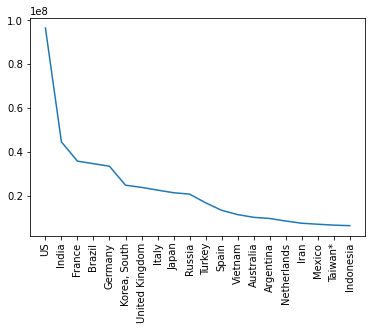

In [20]:
plt.plot(x, y1)
plt.xticks(rotation = 90)
plt.show()

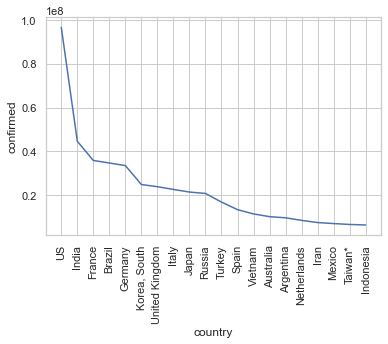

In [21]:
sns.set_theme(style = 'whitegrid')
sns.lineplot(x = x, y = y1)
plt.xticks(rotation = 90)
plt.show()

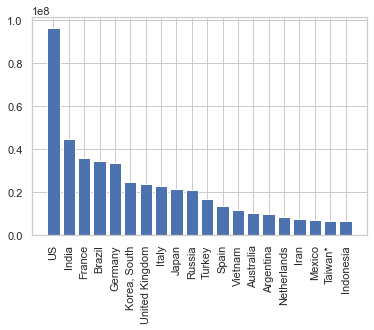

In [22]:
plt.bar(x, y1)
plt.xticks(rotation = 90)
plt.show()

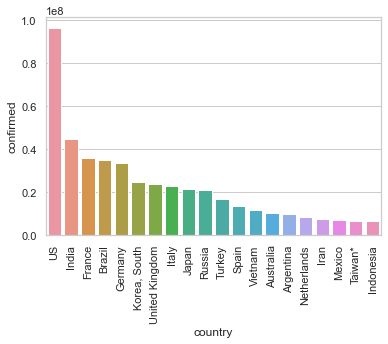

In [23]:
sns.barplot(x = x, y = y1)
plt.xticks(rotation = 90)
plt.show()

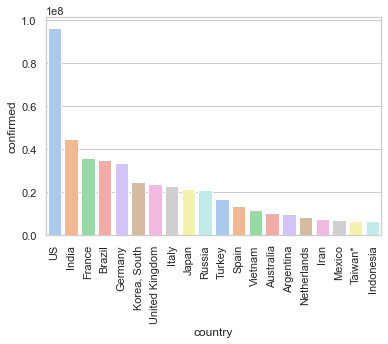

In [28]:
sns.barplot(x = x, y = y1, palette = 'pastel')
plt.xticks(rotation = 90)
plt.show()

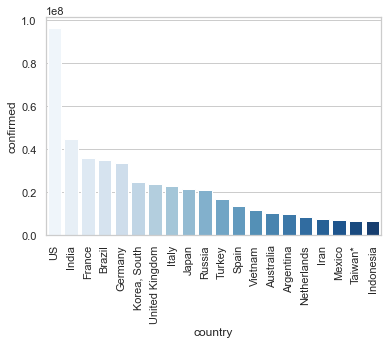

In [35]:
sns.barplot(x = x, y = y1, palette = 'Blues')
plt.xticks(rotation = 90)
plt.show()

In [36]:
top20

,id,country,confirmed,active,deaths,recovered,latitude,longitude,last_update
0,187,US,96550450,None,1061473,None,40.000000,-100.000000,1665012153000
1,81,India,44599301,None,528733,None,20.593684,78.962880,1665012153000
2,64,France,35856904,None,156359,None,46.227600,2.213700,1665012153000
3,25,Brazil,34699017,None,686573,None,-14.235000,-51.925300,1665012153000
4,68,Germany,33519761,None,150192,None,51.165691,10.451526,1665012153000
5,95,"Korea, South",24882894,None,28544,None,35.907757,127.766922,1665012153000
6,191,United Kingdom,23894193,None,207911,None,55.000000,-3.000000,1665012153000
7,87,Italy,22648063,None,177300,None,41.871900,12.567400,1665012153000
8,89,Japan,21455079,None,45286,None,36.204824,138.252924,1665012153000
9,148,Russia,20816640,None,379941,None,61.524000,105.318800,1665012153000


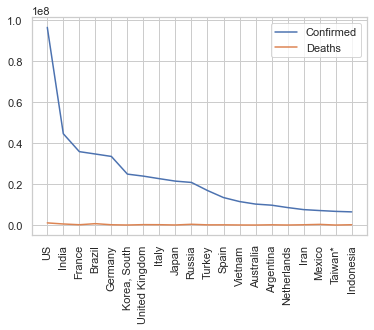

In [38]:
labels = ['Confirmed', 'Deaths']
plt.plot(x, y1, x, y3)
plt.legend(labels, loc = 'upper right')
plt.xticks(rotation = 90)
plt.show()

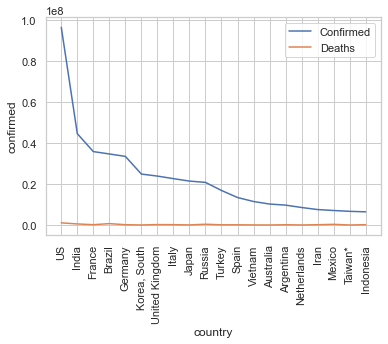

In [42]:
sns.lineplot(x = x, y = y1)
sns.lineplot(x = x, y = y3)
plt.legend(labels, loc = 'upper right')
plt.xticks(rotation = 90)
plt.show()

<Figure size 432x288 with 0 Axes>

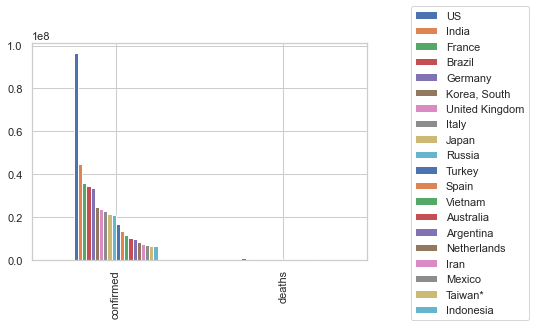

In [74]:
df = pd.DataFrame([y1, y3])
plt.figure()
df.plot.bar()
plt.legend(x, loc = 'lower right', bbox_to_anchor = (1.5, -0.3))
plt.xticks(rotation = 90)
plt.show()

In [75]:
x

0                 US
1              India
2             France
3             Brazil
4            Germany
5       Korea, South
6     United Kingdom
7              Italy
8              Japan
9             Russia
10            Turkey
11             Spain
12           Vietnam
13         Australia
14         Argentina
15       Netherlands
16              Iran
17            Mexico
18           Taiwan*
19         Indonesia
Name: country, dtype: object

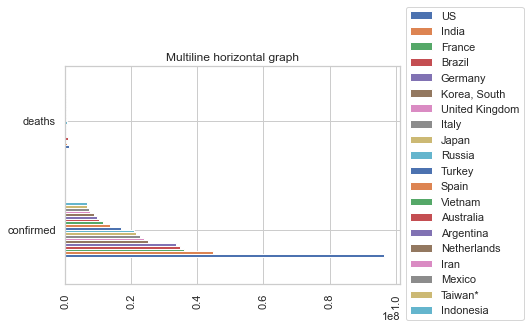

In [79]:
# Multiline horizontal graph
df.plot.barh()
plt.title('Multiline horizontal graph')
plt.legend(x, bbox_to_anchor = (1, 1.3))
plt.xticks(rotation = 90)
plt.show()

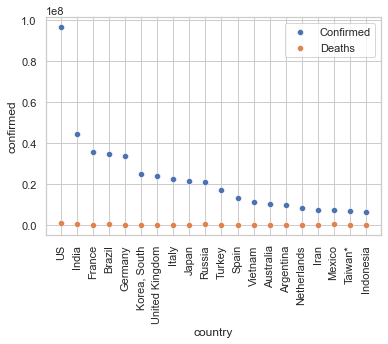

In [82]:
# You can use Seaborn to create a scatter plot as follows:
sns.scatterplot(x=x, y=y1)
sns.scatterplot(x=x, y=y3)
plt.legend(labels, loc='best')
plt.xticks(rotation=90)
plt.show()

In [88]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
confirmed,96550450,44599301,35856904,34699017,33519761,24882894,23894193,22648063,21455079,20816640,16873793,13431098,11483529,10246170,9711355,8552993,7550401,7090965,6685516,6439292
deaths,1061473,528733,156359,686573,150192,28544,207911,177300,45286,379941,101139,114262,43151,15249,129937,23305,144458,330139,11280,158165


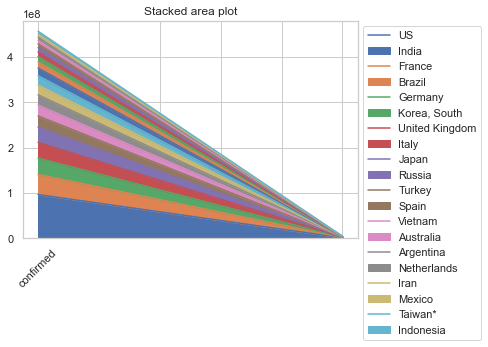

In [90]:
# Stacked area plot
df.plot.area()
plt.legend(x, bbox_to_anchor = (1, 1))
plt.xticks(rotation = 45)
plt.title('Stacked area plot')
plt.show()

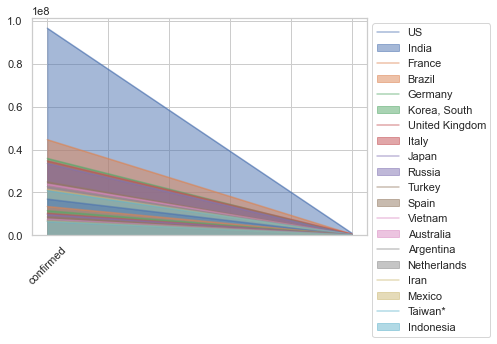

In [93]:
# You can create an unstacked and transparent area plot for the data as follows:
df.plot.area(stacked=False)
plt.legend(x, bbox_to_anchor = (1, 1))
plt.xticks(rotation=45)
plt.show()

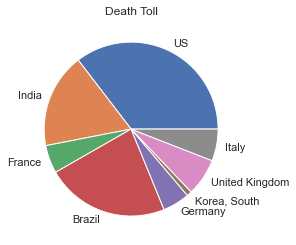

In [99]:
# Pie chart
plt.pie(y3[:8], labels = x[:8])
plt.title("Death Toll")
plt.show()

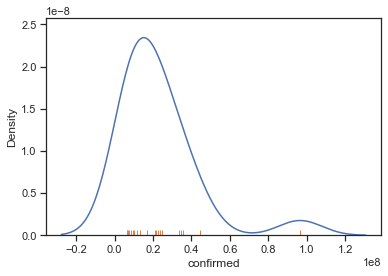

In [100]:
# You can also create a KDE plot with a rug plot, but with the data that we’re using for
# this example, that may not make a lot of sense.
sns.set_theme(style="ticks")
sns.kdeplot(x=y1)
sns.rugplot(x=y1)
plt.show()

## Creating Visualizations of Animal Disease Data

In [101]:
df = pd.read_csv('https://raw.githubusercontent.com/Kesterchia/Global-animal-diseases/main/Data/Outbreak_240817.csv')
df.head()

,Id,source,latitude,longitude,region,country,admin1,localityName,localityQuality,observationDate,...,speciesDescription,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansGenderDesc,humansAge,humansAffected,humansDeaths
0,230399,OIE,-27.900000,30.800000,Africa,South Africa,KwaZulu-Natal,HPAI_H5N8_2017_019,Exact,17/08/2017,...,"domestic, unspecified bird",248000.0,12.0,12.0,50000.0,0.0,NaN,0.0,NaN,NaN
1,230381,OIE,54.837037,73.354155,Europe,Russian Federation,Omskaya Oblast,Novaya Stanica,Exact,16/08/2017,...,"domestic, swine",122.0,6.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
2,230333,OIE,-21.077740,30.211620,Africa,Zimbabwe,Masvingo,Mwambe,Exact,16/08/2017,...,"domestic, cattle",1283.0,112.0,0.0,NaN,7.0,NaN,NaN,NaN,NaN
3,230396,OIE,-26.000000,28.300000,Africa,South Africa,Gauteng,HPAI_H5N8_2017_020,Exact,15/08/2017,...,"wild, unspecified bird",NaN,1.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN
4,230371,OIE,49.237900,17.700200,Europe,Czech Republic,Jihomoravsky,Hvozdná,Exact,15/08/2017,...,"wild, wild boar",NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
df.shape

(17008, 24)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17008 entries, 0 to 17007
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  17008 non-null  int64  
 1   source              17008 non-null  object 
 2   latitude            17008 non-null  float64
 3   longitude           17008 non-null  float64
 4   region              17008 non-null  object 
 5   country             17008 non-null  object 
 6   admin1              17008 non-null  object 
 7   localityName        17008 non-null  object 
 8   localityQuality     17008 non-null  object 
 9   observationDate     16506 non-null  object 
 10  reportingDate       17008 non-null  object 
 11  status              17008 non-null  object 
 12  disease             17008 non-null  object 
 13  serotypes           10067 non-null  object 
 14  speciesDescription  15360 non-null  object 
 15  sumAtRisk           9757 non-null   float64
 16  sumC

In [105]:
df.describe()

,Id,latitude,longitude,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansAge,humansAffected,humansDeaths
count,17008.000000,17008.000000,17008.000000,9.757000e+03,14535.000000,14168.000000,13005.000000,12235.000000,1068.000000,1417.000000,451.000000
mean,218823.465075,39.168443,37.774981,7.500692e+03,328.183007,199.190147,3765.857978,100.211443,17.701311,1.017643,0.889135
std,7048.338831,16.817821,41.034310,4.427669e+04,5821.929892,4109.453986,28355.192298,4341.287763,26.932867,0.620142,0.321306
min,206270.000000,-36.856210,-146.490000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,212070.750000,32.090000,11.950000,1.100000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,219591.500000,43.821579,24.511700,9.000000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,224717.250000,48.102805,43.424390,7.160000e+02,5.000000,2.000000,5.000000,0.000000,41.000000,1.000000,1.000000
max,230399.000000,68.392000,144.847374,2.000000e+06,460000.000000,439799.000000,913590.000000,339006.000000,94.000000,24.000000,2.000000


In [106]:
df2 = pd.DataFrame(df.groupby('country').sum('sumCases')['sumCases'])
df2

,sumCases
country,
Albania,1157.0
Algeria,1321.0
Angola,23.0
Argentina,0.0
Armenia,7.0
...,...
Uruguay,53.0
Viet Nam,70806.0
West Bank,1132.0


In [110]:
df3 = df2.sort_values(by = 'sumCases', ascending = False).head(10)
df3

,sumCases
country,
Italy,846756.0
Iraq,590049.0
Bulgaria,453353.0
China,370357.0
Taiwan (Province of China),296268.0
Egypt,284449.0
Iran (Islamic Republic of),225798.0
Nigeria,203688.0
Germany,133425.0


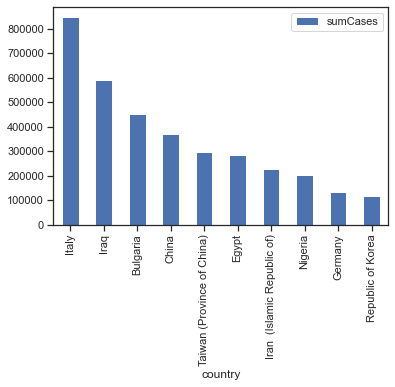

In [111]:
df3.plot.bar()
plt.xticks(rotation = 90)
plt.show()

In [113]:
# You can convert the index to a column as follows:
df3.reset_index(level = 0, inplace = True)
df3

,country,sumCases
0,Italy,846756.0
1,Iraq,590049.0
2,Bulgaria,453353.0
3,China,370357.0
4,Taiwan (Province of China),296268.0
5,Egypt,284449.0
6,Iran (Islamic Republic of),225798.0
7,Nigeria,203688.0
8,Germany,133425.0
9,Republic of Korea,117018.0


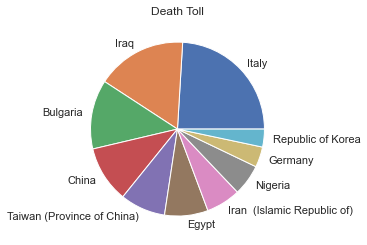

In [115]:
# Pie chart
plt.pie(df3['sumCases'],
        labels = df3['country'])
plt.title('Death Toll')
plt.show()


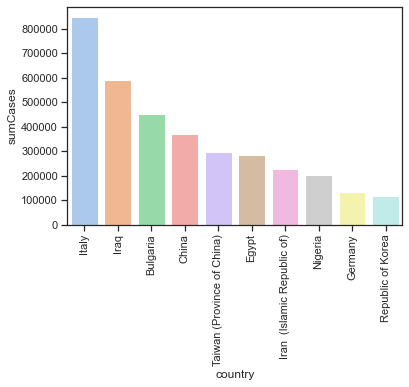

In [120]:
# Bar chart with Seaborn
sns.barplot(x = 'country',
            y = 'sumCases',
            data = df3,
            palette = 'pastel')
plt.xticks(rotation = 90)
plt.show()